# Cálculo de los pesos del NASA-TX

Este fichero permite la lectura de los ficheros de NASA-TX iniciales. Crea un csv con los pesos asociados a las respuestas dadas por todos los participantes en un formato similar a 

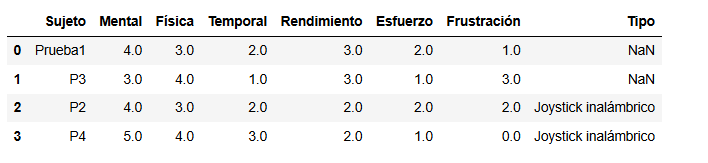



In [84]:
import pandas as pd
import os
import numpy as np



def leer_csv_pandas(directorio, nombre_archivo):
    """
    Lee un fichero CSV usando la biblioteca 'pandas'.

    Args:
        directorio (str): La ruta al directorio donde se encuentra el archivo.
        nombre_archivo (str): El nombre completo del archivo CSV (ej: 'datos.csv').
    """
    ruta_completa = os.path.join(directorio, nombre_archivo)

    try:
        # La función read_csv es muy flexible y potente
        df = pd.read_csv(ruta_completa)

        #print(f"**Contenido de '{nombre_archivo}' (usando 'pandas'):**")
        # Imprime el DataFrame (tabla de datos)
        #print(df)
        #df.head()
        #print("\n--- Información del DataFrame ---")
        # Muestra un resumen de las columnas, tipos de datos, etc.
        df.info()
       # print("---------------------------------------")
        return df

    except FileNotFoundError:
        print(f"❌ Error: El archivo '{ruta_completa}' no se encontró.")
    except Exception as e:
        print(f"❌ Ocurrió un error al leer el archivo: {e}")

# --- Ejemplo de uso ---
# **¡IMPORTANTE!** Cambia estas rutas y nombre de archivo por los reales.
DIRECTORIO_CSV = './' 
NOMBRE_FICHERO = 'SAMU_ Test NASA-TX_0.csv'

df =leer_csv_pandas(DIRECTORIO_CSV, NOMBRE_FICHERO)
#df.head()
Sujetos=df.iloc[:,1].tolist()
Edad = df.iloc[:,2].tolist()
Sexo = df.iloc[:,3].tolist()
Tipo = df.iloc[:,-1].tolist()
nombre_columnas = ['Sujeto','Mental','Física','Temporal','Rendimiento','Esfuerzo','Frustración','Tipo']
weights = pd.DataFrame(np.zeros((len(Sujetos),8)),columns=nombre_columnas)
weights['Sujeto'] = Sujetos
weights['Tipo'] = Tipo

for s in np.arange(len(Sujetos)):

    #-----MENTAL------------------
    if df.iloc[s,4]==1:
        weights.iloc[s,1]+=1
    if df.iloc[s,5]==1:
        weights.iloc[s,1]+=1
    if df.iloc[s,6]==1:
        weights.iloc[s,1]+=1
    if df.iloc[s,7]==1:
        weights.iloc[s,1]+=1
    if df.iloc[s,8]==1:
        weights.iloc[s,1]+=1
 
    #-----FÍSICA------------------    
    if df.iloc[s,4]==2:
        weights.iloc[s,2]+=1
    if df.iloc[s,9]==1:
        weights.iloc[s,2]+=1
    if df.iloc[s,10]==1:
        weights.iloc[s,2]+=1
    if df.iloc[s,11]==1:
        weights.iloc[s,2]+=1
    if df.iloc[s,12]==1:
        weights.iloc[s,2]+=1

    #-----TEMPORAL------------------
    if df.iloc[s,5]==2:
        weights.iloc[s,3]+=1
    if df.iloc[s,9]==2:
        weights.iloc[s,3]+=1
    if df.iloc[s,13]==1:
        weights.iloc[s,3]+=1
    if df.iloc[s,14]==1:
        weights.iloc[s,3]+=1
    if df.iloc[s,15]==1:
        weights.iloc[s,3]+=1

    #--------RENDIMIENTO-----------
    if df.iloc[s,6]==2:
        weights.iloc[s,4]+=1
    if df.iloc[s,10]==2:
        weights.iloc[s,4]+=1
    if df.iloc[s,13]==2:
        weights.iloc[s,4]+=1
    if df.iloc[s,16]==1:
        weights.iloc[s,4]+=1
    if df.iloc[s,17]==1:
        weights.iloc[s,4]+=1

 
        
        
    #--------ESFUERZO-----------
    if df.iloc[s,7]==2:
        weights.iloc[s,5]+=1
    if df.iloc[s,11]==2:
        weights.iloc[s,5]+=1
    if df.iloc[s,14]==2:
        weights.iloc[s,5]+=1
    if df.iloc[s,16]==2:
        weights.iloc[s,5]+=1
    if df.iloc[s,18]==1:
        weights.iloc[s,5]+=1

   #--------FRUSTRACIÓN-----------
    if df.iloc[s,8]==2:
        weights.iloc[s,6]+=1
    if df.iloc[s,12]==2:
        weights.iloc[s,6]+=1
    if df.iloc[s,15]==2:
        weights.iloc[s,6]+=1
    if df.iloc[s,17]==2:
        weights.iloc[s,6]+=1
    if df.iloc[s,18]==2:
        weights.iloc[s,6]+=1
        
df.head()
weights.head()
weights.to_csv('NASA_weights.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Timestamp                           4 non-null      object
 1   Identificación
(Acrónimo asignado)  4 non-null      object
 2   Edad                                4 non-null      int64 
 3   Sexo biológico
                     4 non-null      object
 4   1. Mental vs Física                 4 non-null      int64 
 5   2. Mental vs Temporal               4 non-null      int64 
 6   3. Mental vs Rendimiento            4 non-null      int64 
 7   4. Mental vs Esfuerzo               4 non-null      int64 
 8   5. Mental vs Frustración            4 non-null      int64 
 9   6. Física vs Temporal               4 non-null      int64 
 10  7. Física vs Rendimiento            4 non-null      int64 
 11  8. Física vs Esfuerzo               4 non-null      int64 
 12

In [85]:
print(df.iloc[:,2])
print(df['Edad'])

0    42
1    55
2    56
3    22
Name: Edad, dtype: int64
0    42
1    55
2    56
3    22
Name: Edad, dtype: int64


In [86]:
print(df.iloc[:,1].tolist())
print(df.shape)

['Prueba1', 'P3', 'P2', 'P4']
(4, 20)


In [87]:
df.head()

,Timestamp,Identificación\n(Acrónimo asignado),Edad,Sexo biológico\n,1. Mental vs Física,2. Mental vs Temporal,3. Mental vs Rendimiento,4. Mental vs Esfuerzo,5. Mental vs Frustración,6. Física vs Temporal,7. Física vs Rendimiento,8. Física vs Esfuerzo,9. Física vs Frustración,10. Temporal vs Rendimiento,11. Temporal vs Esfuerzo,12. Temporal vs Frustración,13. Rendimiento vs Esfuerzo,14. Rendimiento vs Frustración,15. Esfuerzo vs Frustración,Tipo de Experimento
0,11/10/2025 8:57:44,Prueba1,42,Prefiero no decirlo,1,1,1,1,2,1,2,1,1,1,2,1,1,1,1,NaN
1,11/10/2025 8:58:20,P3,55,Maculino,2,1,1,1,2,1,2,1,1,2,1,2,1,2,1,NaN
2,11/10/2025 12:09:21,P2,56,Masculino,1,1,1,2,1,1,1,1,2,2,1,1,1,2,1,Joystick inalámbrico
3,11/10/2025 12:10:00,P4,22,Prefiero no decirlo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Joystick inalámbrico


In [88]:
weights.head()

,Sujeto,Mental,Física,Temporal,Rendimiento,Esfuerzo,Frustración,Tipo
0,Prueba1,4.0,3.0,2.0,3.0,2.0,1.0,NaN
1,P3,3.0,4.0,1.0,3.0,1.0,3.0,NaN
2,P2,4.0,3.0,2.0,2.0,2.0,2.0,Joystick inalámbrico
3,P4,5.0,4.0,3.0,2.0,1.0,0.0,Joystick inalámbrico
